In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Downloading Data¶
To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df = pd.read_csv(path) 

Understanding the Data

FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

In [7]:
cdf = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf.head(9)

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244
5,6,3.5,10.0,230
6,6,3.5,10.1,232
7,6,3.7,11.1,255
8,6,3.7,11.6,267


We can plot each of these features

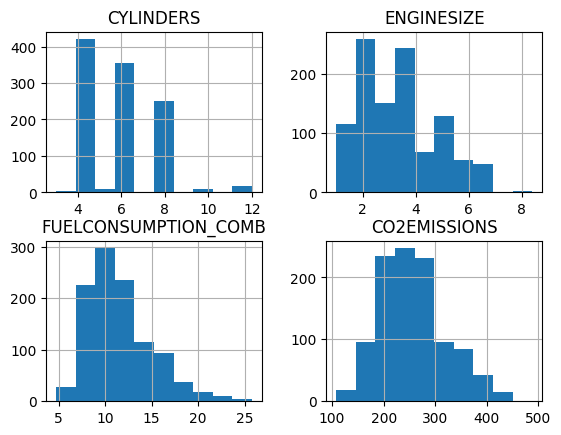

In [8]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is

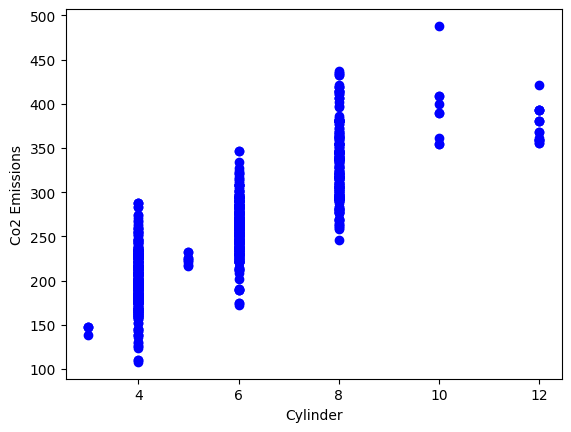

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinder')
plt.ylabel('Co2 Emissions')
plt.show()

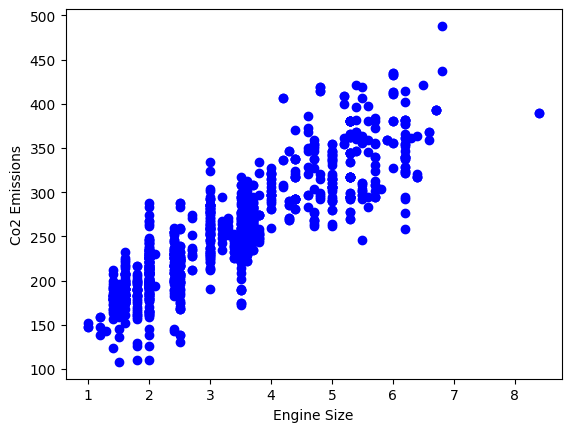

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

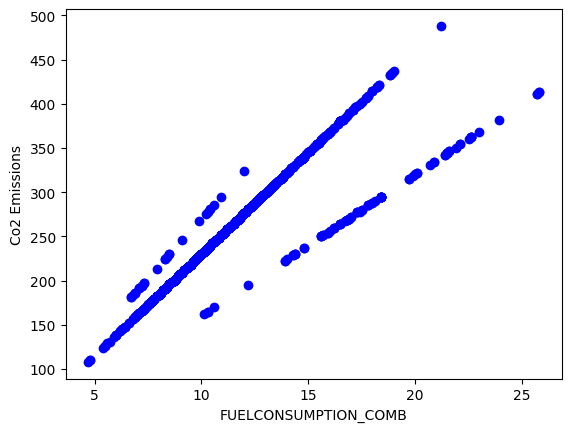

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Co2 Emissions')
plt.show()

Creating train and test dataset¶

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

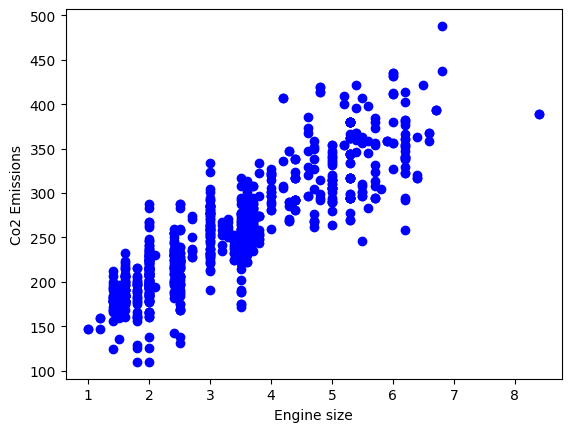

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Co2 Emissions')
plt.show()

#### Modeling

Using sklearn package to model data.

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print("Coefficients: ", regr.coef_)
print("Intercepts ", regr.intercept_)

Coefficients:  [[39.09042009]]
Intercepts  [126.20690155]


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs
We can plot the fit line over the data:

Text(0, 0.5, 'Co2 Emissions')

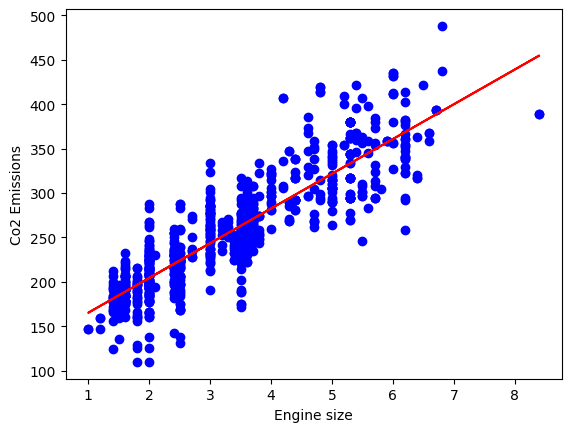

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('Co2 Emissions')

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [37]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print(test_y_[0])
print("Mean absolute error, MAE: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squres, MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-Score: %.2f, " % r2_score(test_y, test_y_))

[125.69732992]
Mean absolute error, MAE: 131.17
Residual sum of squres, MSE: 19150.21
R2-Score: -3.85, 


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe

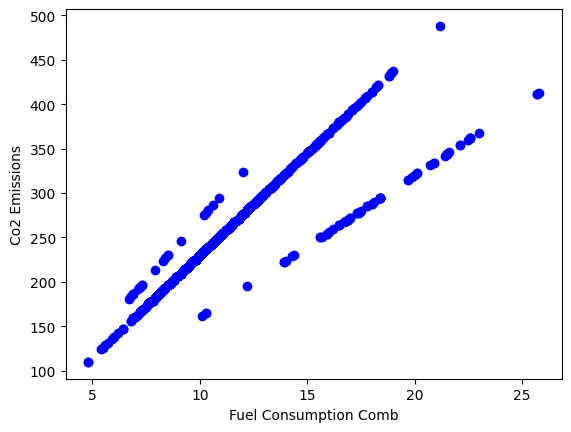

In [32]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Comb')
plt.ylabel('Co2 Emissions')
plt.show()

In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print("Coefficients: ", regr.coef_)
print("Intercepts ", regr.intercept_)

Coefficients:  [[16.16555603]]
Intercepts  [69.11788382]


Text(0, 0.5, 'Co2 Emissions')

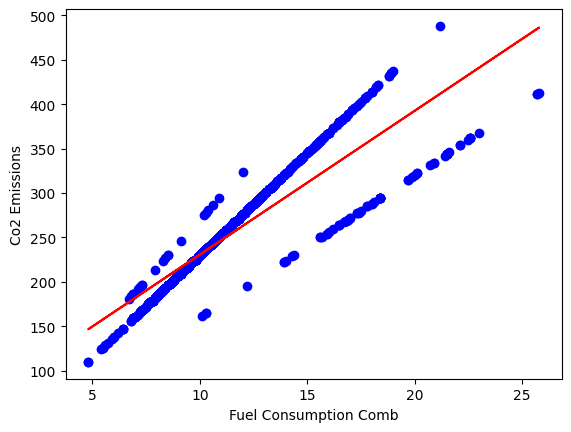

In [34]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Fuel Consumption Comb')
plt.ylabel('Co2 Emissions')

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
# test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error, MAE: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Residual sum of squres, MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-Score: %.2f, " % r2_score(test_y, test_y_))

Mean absolute error, MAE: 21.07
Residual sum of squres, MSE: 830.54
R2-Score: 0.79, 
